In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### 1) Function for gradient descent

In [37]:
def gradient_descent(f, grad_f, x0, kmax, lr='Armijo', tolf = 10e-6, tolx = 10e-6):
    '''
    Inputs : 
       - f is a python function
       - grad_f is a python function
       - x0 is the starting guess
       - tolf and tolx are conditions
       - kmax is maximum number of iteration, to avoid infinite loops
       - lr is the value of alpha, if None the armijo rule is applied
    Returns :
       x --> stationary point
       f_val --> A vector containing the values of f during the iterations
       err_val --> A vector containing the values of || grad(f(Xk) || 
    '''
    k = 0

    fval = np.zeros((kmax + 1,))
    
    err_val = np.zeros((kmax +1,))

    grads = []

    conditions = False  
    
    first_value = x0
    
    x_val = []
    
    
   
    while not conditions:
        #update alpha
        if lr == 'Armijo':
            alpha = backtracking(f, grad_f, x0)
        else : 
            alpha = lr
        # update x 

        grad = np.array(grad_f(x0))
        x = x0 - grad * alpha
        x_val.append(x)
        grads.append(grad)
        fval[k] = f(x)
        err_val[k] = np.linalg.norm(x - x0)

        # conditions to finish the loop update
        conditions = k >= kmax or np.linalg.norm(grad_f(x)) < tolf * np.linalg.norm(grad_f(first_value)) or err_val[k] < tolx * np.linalg.norm(x0)  
       
        x0 = x

        k += 1

    fval = fval[:k]
    err_val = err_val[:k]

    return x, fval, err_val, x_val, grads

def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * np.array(grad_f(x))) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha


## 1.1) Testing with different functions

In [47]:
def f1(x, dom = False):
    if dom :
        return 2
    return (x[0] - 3)**2 + (x[1] -1)**2
def grad_f1(x):
    return 2 * (x[0] - 3), 2 * (x[1] - 1)

def f2(x, dom = False):
    if dom: 
        return 2
    return 10 * (x[0] - 1)**2 + (x[1] - 2)**2
def grad_f2(x):
    return 20 * (x[0] - 1), 2 * (x[1] - 2)

def f3(N, x, dom = False):
    if dom: 
        return A.shape[0]
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    return np.linalg.norm(A @ x - b, 'fro')**2
def grad_f3(x, N):
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    return -2 * (b - A @ x).T @ A

def f4(N, x, lmbd, dom = False):
    if dom :
        return A.shape[0]
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    return np.linalg.norm(A @ x - b, 'fro') + lmbd / 2 * np.linalg.norm(x)**2
def grad_f4(N, x, lmbd):
    '''
    Shapes :
    A --> N x N 
    b --> N x 1
    x --> N x 1 
    '''
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    return -2 * (b - A @ x).T @ A + lmbd * x.T

def f5(x, dom = False):
    if dom:
        return 1
    return x**4 + x**3 - 2 * x**2 - 2 * x
def grad_f5(x):
    return 4 * x**3 + 3 * x **2 - 4 * x - 2

In [15]:
def plot(x_data, y_data, title, xlab = None, col = None, form = None, marker = None, mode = 'Classic'):
    if mode == 'Scatter':
        plt.scatter(x_data, y_data, c = col, marker = marker)
    else :
        plt.plot(x_data, y_data, c = col, marker = marker)
    plt.title(title)
    plt.xlabel(xlab)
    plt.show()



f(x1, x2) = (x1 - 3)**2 + (x2 -1)**2
Min obtained : [2.99979969 0.99993323]
Real minimum : [3 1]
 Final error : [-2.00309281e-04 -6.67697604e-05]
 lr : Armijo


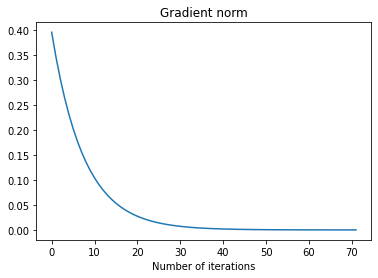

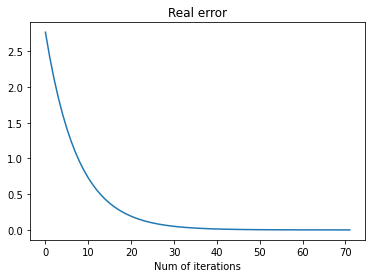

In [48]:
# 1) f1

real_min = np.array((3, 1))

# Armijo algorithm 
x , f_val, err_val, x_val, grads = gradient_descent(f1, grad_f1, np.zeros((2,)), kmax = 100 , lr='Armijo')
print(
    'f(x1, x2) = (x1 - 3)**2 + (x2 -1)**2\nMin obtained : {}\nReal minimum : {}\n Final error : {}\n lr : {}'.format(x, real_min, x - real_min, 'Armijo')
)
plot(
      range(len(err_val)), 
      err_val, 
      'Gradient norm',
      xlab = 'Number of iterations'
)
plot(
    range(len(x_val)),
    np.linalg.norm(x_val - real_min, axis = 1),
    'Real error',
    xlab = 'Num of iterations',
)


f(x1, x2) = (x1 - 3)**2 + (x2 -1)**2
Min obtained :             [2.99979969 0.99993323]
Real minimum : [3 1]
 Final error : [-2.00309281e-04 -6.67697604e-05]
 lr : Armijo


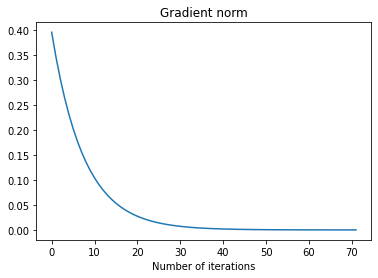

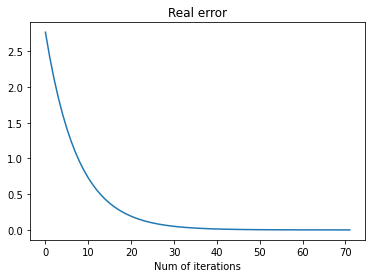

f(x1, x2) = (x1 - 3)**2 + (x2 -1)**2
Min obtained :             [6. 2.]
Real minimum : [3 1]
 Final error : [3. 1.]
 lr : 1.0


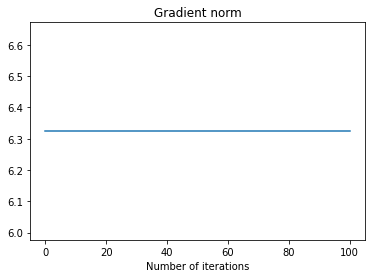

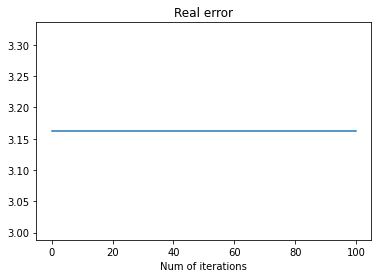

f(x1, x2) = (x1 - 3)**2 + (x2 -1)**2
Min obtained :             [2.99979969 0.99993323]
Real minimum : [3 1]
 Final error : [-2.00309281e-04 -6.67697604e-05]
 lr : 0.0625


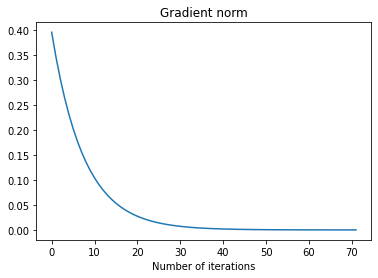

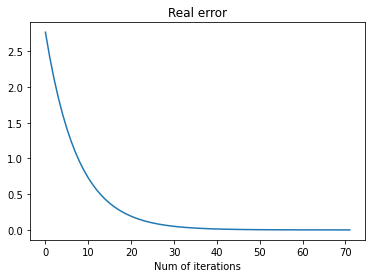

f(x1, x2) = (x1 - 3)**2 + (x2 -1)**2
Min obtained :             [2.75985665 0.91995222]
Real minimum : [3 1]
 Final error : [-0.24014335 -0.08004778]
 lr : 0.012345679012345678


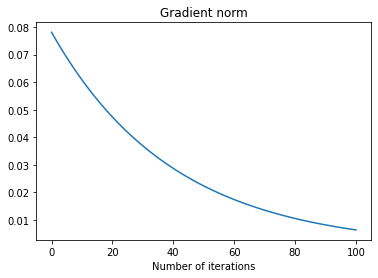

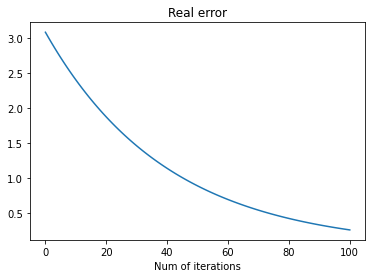

f(x1, x2) = (x1 - 3)**2 + (x2 -1)**2
Min obtained :             [1.64140461 0.54713487]
Real minimum : [3 1]
 Final error : [-1.35859539 -0.45286513]
 lr : 0.00390625


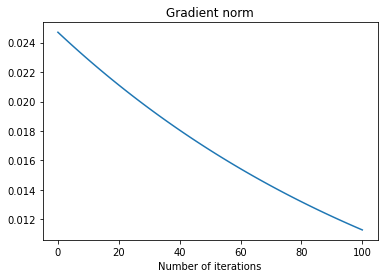

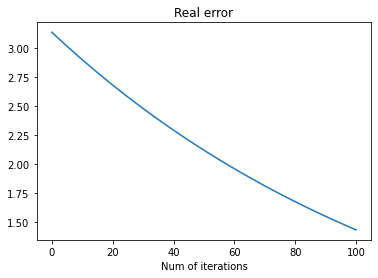

In [49]:
lrates = [1 / n**4 for n in range(1,5)]
lrates.insert(0, 'Armijo')
for lr in lrates : 
    x , f_val, err_val, x_val, grads = gradient_descent(f1, grad_f1, np.zeros((2,)), kmax = 100 , lr=lr)
    print(
        'f(x1, x2) = (x1 - 3)**2 + (x2 -1)**2\nMin obtained : \
            {}\nReal minimum : {}\n Final error : {}\n lr : {}'.format(x, real_min, x - real_min, lr)
    )
    plot(
        range(len(err_val)), 
        err_val, 
        'Gradient norm',
        xlab = 'Number of iterations'
    )
    plot(
        range(len(x_val)),
        np.linalg.norm(x_val - real_min, axis = 1),
        'Real error',
        xlab = 'Num of iterations',
    )

<function f1 at 0x0000015DCE1CC670>
Min obtained :                 [2.99979969 0.99993323]
Real minimum : [3 1]
 Final error : [-2.00309281e-04 -6.67697604e-05]
 lr : Armijo


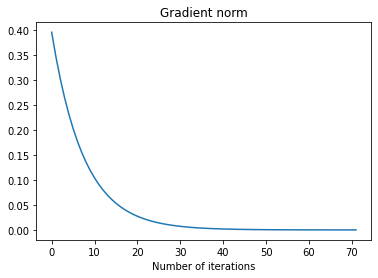

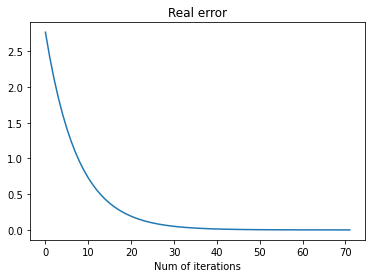

<function f1 at 0x0000015DCE1CC670>
Min obtained :                 [6. 2.]
Real minimum : [3 1]
 Final error : [3. 1.]
 lr : 1.0


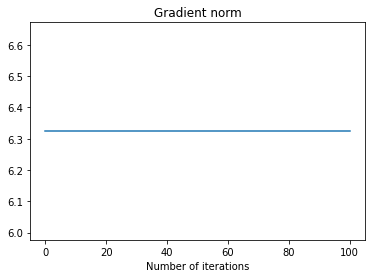

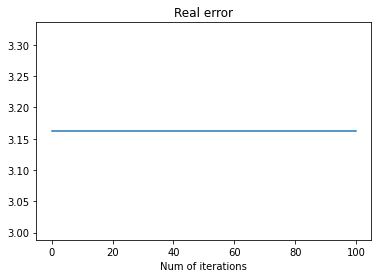

<function f1 at 0x0000015DCE1CC670>
Min obtained :                 [2.99979969 0.99993323]
Real minimum : [3 1]
 Final error : [-2.00309281e-04 -6.67697604e-05]
 lr : 0.0625


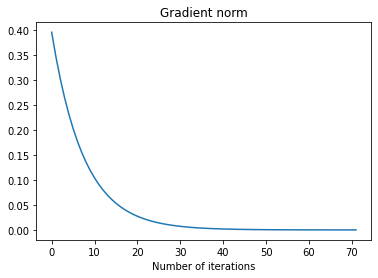

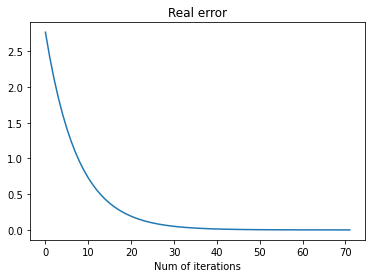

<function f1 at 0x0000015DCE1CC670>
Min obtained :                 [2.75985665 0.91995222]
Real minimum : [3 1]
 Final error : [-0.24014335 -0.08004778]
 lr : 0.012345679012345678


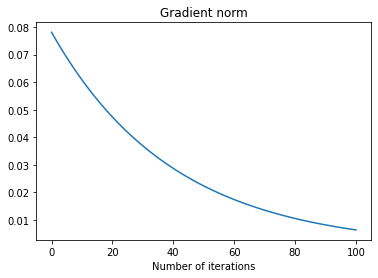

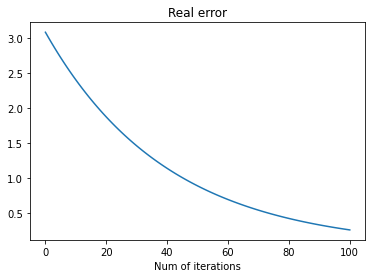

<function f1 at 0x0000015DCE1CC670>
Min obtained :                 [1.64140461 0.54713487]
Real minimum : [3 1]
 Final error : [-1.35859539 -0.45286513]
 lr : 0.00390625


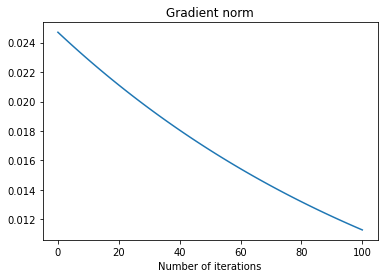

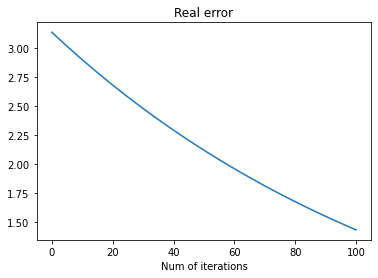

<function f2 at 0x0000015DCA79C310>
Min obtained :                 [1.         1.99986034]
Real minimum : [3 1]
 Final error : [-2.          0.99986034]
 lr : Armijo


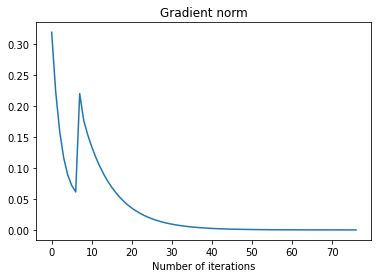

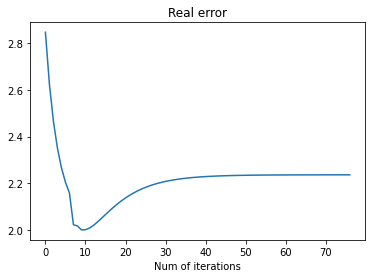

<function f2 at 0x0000015DCA79C310>
Min obtained :                 [1.42598086e+129 4.00000000e+000]
Real minimum : [3 1]
 Final error : [1.42598086e+129 3.00000000e+000]
 lr : 1.0


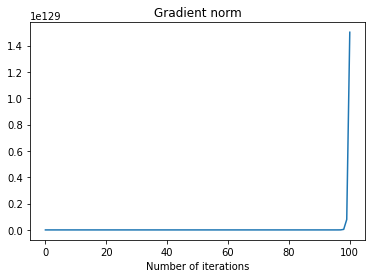

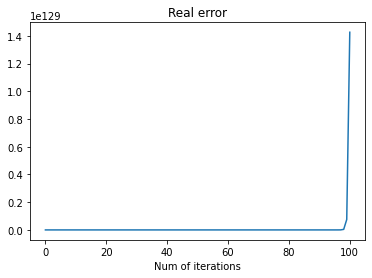

<function f2 at 0x0000015DCA79C310>
Min obtained :                 [1.         1.99984738]
Real minimum : [3 1]
 Final error : [-2.          0.99984738]
 lr : 0.0625


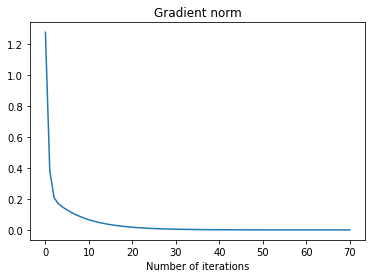

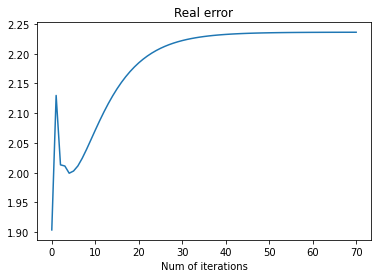

<function f2 at 0x0000015DCA79C310>
Min obtained :                 [1.         1.83990443]
Real minimum : [3 1]
 Final error : [-2.          0.83990443]
 lr : 0.012345679012345678


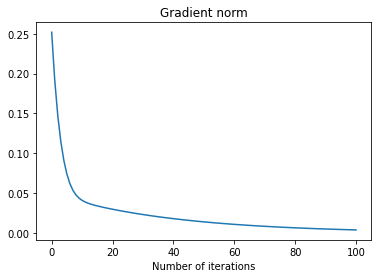

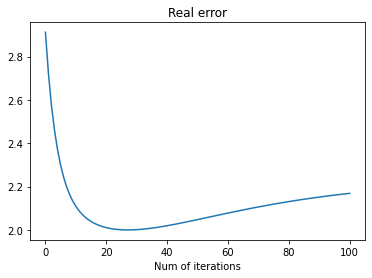

<function f2 at 0x0000015DCA79C310>
Min obtained :                 [0.99972968 1.09426974]
Real minimum : [3 1]
 Final error : [-2.00027032  0.09426974]
 lr : 0.00390625


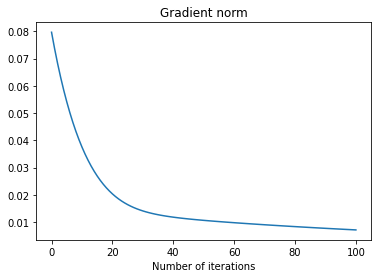

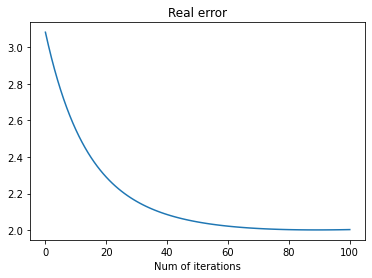

<function f5 at 0x0000015DCA79C670>
Min obtained :                 [0.92219092]
Real minimum : [3 1]
 Final error : [-2.07780908 -0.07780908]
 lr : Armijo


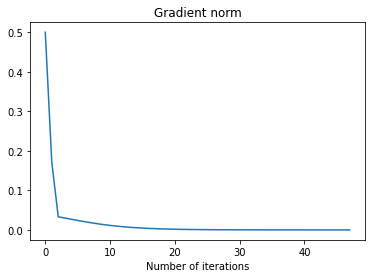

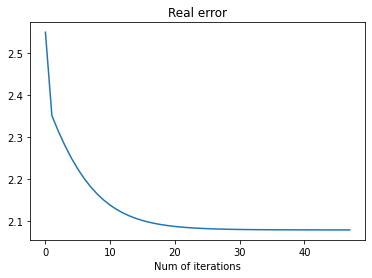

<function f5 at 0x0000015DCA79C670>
Min obtained :                 [nan]
Real minimum : [3 1]
 Final error : [nan nan]
 lr : 1.0


C:\Users\Kilian\AppData\Local\Temp/ipykernel_16024/1226802523.py:50: RuntimeWarning: overflow encountered in power
  return x**4 + x**3 - 2 * x**2 - 2 * x
C:\Users\Kilian\AppData\Local\Temp/ipykernel_16024/1226802523.py:50: RuntimeWarning: invalid value encountered in add
  return x**4 + x**3 - 2 * x**2 - 2 * x
C:\Users\Kilian\AppData\Local\Temp/ipykernel_16024/1226802523.py:52: RuntimeWarning: overflow encountered in power
  return 4 * x**3 + 3 * x **2 - 4 * x - 2
C:\Users\Kilian\AppData\Local\Temp/ipykernel_16024/1226802523.py:50: RuntimeWarning: invalid value encountered in subtract
  return x**4 + x**3 - 2 * x**2 - 2 * x
C:\Users\Kilian\AppData\Local\Temp/ipykernel_16024/1226802523.py:52: RuntimeWarning: invalid value encountered in subtract
  return 4 * x**3 + 3 * x **2 - 4 * x - 2


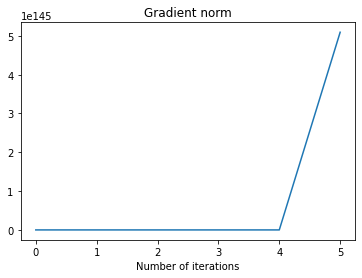

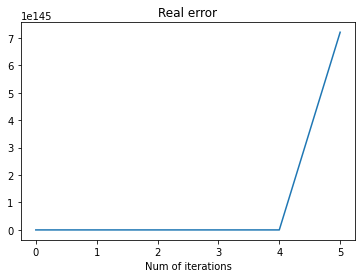

<function f5 at 0x0000015DCA79C670>
Min obtained :                 [0.92222292]
Real minimum : [3 1]
 Final error : [-2.07777708 -0.07777708]
 lr : 0.0625


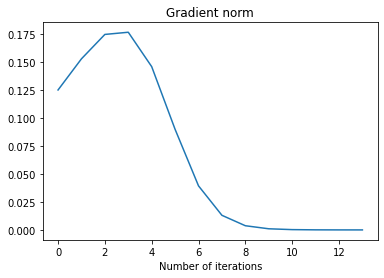

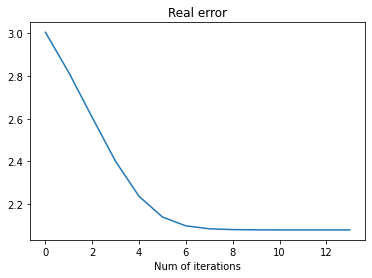

<function f5 at 0x0000015DCA79C670>
Min obtained :                 [0.92217322]
Real minimum : [3 1]
 Final error : [-2.07782678 -0.07782678]
 lr : 0.012345679012345678


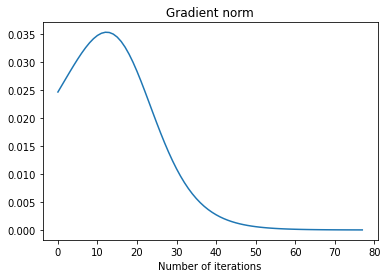

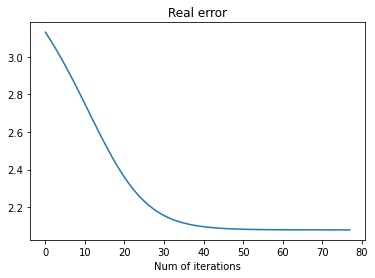

<function f5 at 0x0000015DCA79C670>
Min obtained :                 [0.85540649]
Real minimum : [3 1]
 Final error : [-2.14459351 -0.14459351]
 lr : 0.00390625


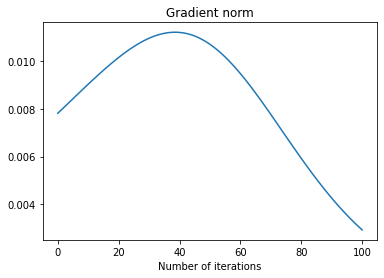

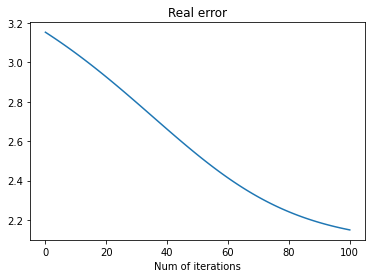

In [50]:
# Automatic analysis of f1 f2 and f3 functions with various lr.

# Still to work with

func_dict = {f1: grad_f1, f2: grad_f2, f5: grad_f5}
lrates = [1 / n**4 for n in range(1,5)]
lrates.insert(0, 'Armijo')
for f in func_dict:
    for lr in lrates : 
        x , f_val, err_val, x_val, grads = gradient_descent(f, func_dict[f], np.zeros((f(None, True) ,)), kmax = 100 , lr=lr)
        print(
            '{}\nMin obtained : \
                {}\nReal minimum : {}\n Final error : {}\n lr : {}'.format(f, x, real_min, x - real_min, lr)
        )
        plot(
            range(len(err_val)), 
            err_val, 
            'Gradient norm',
            xlab = 'Number of iterations'
        )
        plot(
            range(len(x_val)),
            np.linalg.norm(x_val - real_min, axis = 1),
            'Real error',
            xlab = 'Num of iterations',
        )
        
        


